In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Sinus Kvadraticus
![task](assets/task.png)

## Använda kod-biblotek
**Numpy** - utökad matematik   
**Matplotlib** - grafritning

![enhetscirkeln](assets/enhetscirkeln.png)

![enhetskvadraten](assets/enhetskvadraten.png)

![sink](assets/enhetskvadraten-sink.png)

![cosk](assets/enhetskvadraten-cosk.png)

## Hur beräknas funktionsvärden t.ex sink 10° och cosk 175°?

### Sink(v)

\begin{cases}
-45^\circ \lt v \le 45^\circ \rightarrow sink(v) = tan(v) \\ 
45^\circ \lt v \le 135^\circ \rightarrow sink(v) = 1 \\ 
135^\circ \lt v \le 225^\circ \rightarrow sink(v) = -tan(v) \\
225^\circ \lt v \le 315^\circ \rightarrow sink(v) = -1
\end{cases}

In [2]:
def sink(v):
    # Perioder
    p = 0 if v <= 2*np.pi else math.floor(v / (2*np.pi))
    v = v - 2 * np.pi * p

    if v >= 7*np.pi/4 or v < np.pi/4:
        return np.tan(v)
    elif v >= np.pi/4 and v < 3*np.pi/4:
        return 1
    elif v >= 3*np.pi/4 and v < 5*np.pi/4:
        return -np.tan(v)
    else:
        return -1

In [3]:
sink(np.deg2rad(10))

0.17632698070846498

### Cosk(v)

\begin{cases}
-45^\circ \lt v \le 45^\circ \rightarrow cosk(v) = 1\\ 
45^\circ \lt v \le 135^\circ \rightarrow cosk(v) = \frac{1}{tan(v)} \\ 
135^\circ \lt v \le 225^\circ \rightarrow cosk(v) = -1 \\
225^\circ \lt v \le 315^\circ \rightarrow cosk(v) = -\frac{1}{tan(v)}
\end{cases}

In [4]:
def cosk(v):
    p = 0 if v <= 2*np.pi else math.floor(v / (2*np.pi))
    v = v - 2 * np.pi * p

    if v >= 7*np.pi/4 or v < np.pi/4:
        return 1
    elif v >= np.pi/4 and v < 3*np.pi/4:
        return 1/np.tan(v)
    elif v >= 3*np.pi/4 and v < 5*np.pi/4:
        return -1
    else:
        return -(1/np.tan(v))

In [5]:
cosk(np.deg2rad(175))

-1

## Hur ser graferna ut?

In [6]:
x = np.arange(4*np.pi, step=0.001)

### Sink(v)

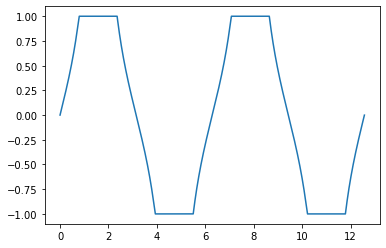

In [7]:
y = [sink(v) for v in x]
plt.plot(x,y)

### Cosk(v)

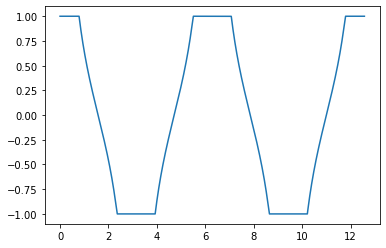

In [8]:
y = [cosk(v) for v in x]
plt.plot(x,y)

## Är funktionerna periodiska och isåfall vilken period?
Båda funktionerna har en period på 360 grader (eller två pi).

## Hur löser man ekvationer av typen sink v = 1 och cosk v = 0.8?

\begin{cases}
45^\circ \lt v \le 135^\circ \rightarrow sink(v) = 1 \\ 
225^\circ \lt v \le 315^\circ \rightarrow sink(v) = -1
\end{cases}

In [9]:
def arcsink(l):
    if l == 1 or l == -1:
        raise BaseException("Function arcsink(l) is not defined for l == 1 || l == -1")
    else:
        return np.arctan(l)

\begin{cases}
-45^\circ \lt v \le 45^\circ \rightarrow cosk(v) = 1\\ 
135^\circ \lt v \le 225^\circ \rightarrow cosk(v) = -1 \\
\end{cases}

In [10]:
def arccosk(l):
    if l == 1 or l == -1:
        raise BaseException("Function arccosk(l) is not defined for l == 1 || l == -1")
    else:
        return np.arctan(1 / l)

In [11]:
np.rad2deg(arccosk(0.8))

51.34019174590991

## Har till exempel trigonometriska ettan och formlerna för dubbla vinkeln någon motsvarighet för de nya funktionerna?

\begin{align}
sink(v)^2 + cosk(v)^2 = 1 \\
sink(2v) = 2 * sink(v) * cosk(v) \\
cosk(2v) = cosk(v)^2 - sink(v)^2 \\
sink(v) - cosk(v + 90^\circ) = 0
\end{align}

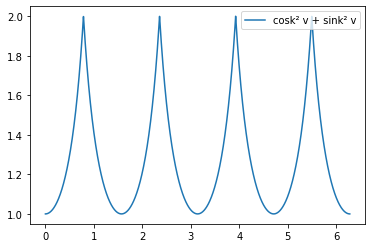

In [12]:
x = np.arange(2*np.pi, step=0.001)
y = [cosk(v) ** 2 + sink(v) ** 2 for v in x]

plt.plot(x, y, label='cosk² v + sink² v')
plt.legend()

"Radien" eller "Hypotenusan" är inte konstant i enhetskvadraten: Pytagoras sats gäller inte.

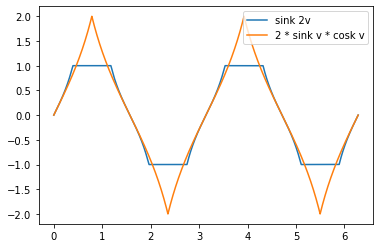

In [13]:
x = np.arange(2*np.pi, step=0.001)

y1 = [sink(2 * v) for v in x]
y2 = [2 * sink(v) * cosk(v) for v in x]

plt.plot(x, y1, label='sink 2v')
plt.plot(x, y2, label='2 * sink v * cosk v')
plt.legend()

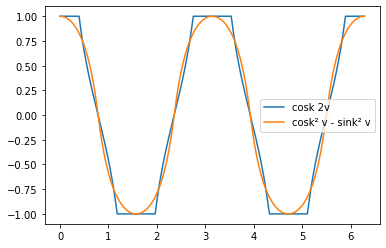

In [14]:
x = np.arange(2*np.pi, step=0.001)

y1 = [cosk(2*v) for v in x]
y2 = [cosk(v) ** 2 - sink(v) ** 2 for v in x]

plt.plot(x, y1, label='cosk 2v')
plt.plot(x, y2, label='cosk² v - sink² v')
plt.legend()

När sink är konstant beter sig cosk som en tan funktion och vice versa.

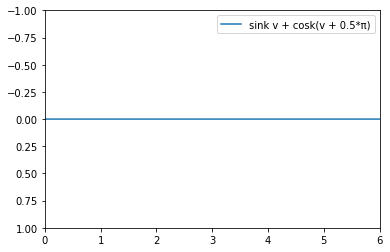

In [15]:
x = np.arange(2*np.pi, step=0.001)

y = [sink(v) + cosk(v + np.pi/2) for v in x]

plt.axis([0, 6, 1, -1])
plt.plot(x, y, label='sink v + cosk(v + 0.5*π)')
plt.legend()

## Går det att göra ett program som ger funktions värdet då vinkeln är given och omvänt ger vinkeln då funktionsvärdet är givet? 

In [16]:
def sinkd(d):
    return arcsink(d) if d < 1 and d > -1 else sink(d)


In [17]:
def coskd(d):
    return arccosk(d) if d < 1 and d > -1 else cosk(d)

Vinklar mellan -1 och 1 kan inte särskiljas mellan funktionsvärden